In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load CSV
df = pd.read_csv("https://raw.githubusercontent.com/aicanizares/agri-food-co2-emission/refs/heads/main/Agrofood_co2_emission.csv")

# Dataset found on Kaggle: https://www.kaggle.com/datasets/alessandrolobello/agri-food-co2-emission-dataset-forecasting-ml

In [2]:
# Columns I want to keep (columns that may relate to climate change, especially from animal agriculture):
# Manure Management                   928 Nans
# Manure applied to Soils             928
# Manure left on Pasture                0
# On-farm energy use                  956
# total_emission                        0

# I want to fill NaNs for Manure Management, Manure applied to Soils and On-farm energy use.

In [3]:
df.shape

(6965, 31)

In [4]:
# Count unique values in the 'Area' column
unique_areas = df["Area"].nunique()

unique_areas

236

In [5]:
unique_years = df["Year"].nunique()

unique_years

31

In [6]:
df.isna().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [7]:
# Count NaN values in "Manure Management" for each country  
nan_counts = df.groupby("Area")["Manure Management"].apply(lambda x: x.isna().sum())  

# Sort countries by most NaNs  
nan_counts_sorted = nan_counts.sort_values(ascending=False)  

# Display result  
print(nan_counts_sorted)

Area
Maldives                     31
Saint Pierre and Miquelon    31
Holy See                     31
Guam                         31
Channel Islands              31
                             ..
Grenada                       0
Guatemala                     0
Guinea                        0
Guinea-Bissau                 0
Zimbabwe                      0
Name: Manure Management, Length: 236, dtype: int64


In [8]:
print(nan_counts_sorted.head(50))

Area
Maldives                                        31
Saint Pierre and Miquelon                       31
Holy See                                        31
Guam                                            31
Channel Islands                                 31
Cayman Islands                                  31
Greenland                                       31
Gibraltar                                       31
Isle of Man                                     31
British Virgin Islands                          31
Turks and Caicos Islands                        31
San Marino                                      31
Montserrat                                      31
Monaco                                          31
United States Virgin Islands                    31
Bermuda                                         31
Mayotte                                         31
Wallis and Futuna Islands                       31
Falkland Islands (Malvinas)                     31
American Samoa            

In [9]:
# Count NaN values in "Manure applied to Soils" for each country  
nan_counts_manure_soils = df.groupby("Area")["Manure applied to Soils"].apply(lambda x: x.isna().sum())  

# Sort countries by most NaNs  
nan_counts_sorted_manure_soils = nan_counts.sort_values(ascending=False)  

print(nan_counts_sorted_manure_soils.head(50))

Area
Maldives                                        31
Saint Pierre and Miquelon                       31
Holy See                                        31
Guam                                            31
Channel Islands                                 31
Cayman Islands                                  31
Greenland                                       31
Gibraltar                                       31
Isle of Man                                     31
British Virgin Islands                          31
Turks and Caicos Islands                        31
San Marino                                      31
Montserrat                                      31
Monaco                                          31
United States Virgin Islands                    31
Bermuda                                         31
Mayotte                                         31
Wallis and Futuna Islands                       31
Falkland Islands (Malvinas)                     31
American Samoa            

In [10]:
# Count NaN values in "On-farm energy use" for each country  
nan_counts_farm_energy = df.groupby("Area")["On-farm energy use"].apply(lambda x: x.isna().sum())  

# Sort countries by most NaNs  
nan_counts_sorted_farm_energy = nan_counts.sort_values(ascending=False)  

print(nan_counts_sorted_farm_energy.head(50))

Area
Maldives                                        31
Saint Pierre and Miquelon                       31
Holy See                                        31
Guam                                            31
Channel Islands                                 31
Cayman Islands                                  31
Greenland                                       31
Gibraltar                                       31
Isle of Man                                     31
British Virgin Islands                          31
Turks and Caicos Islands                        31
San Marino                                      31
Montserrat                                      31
Monaco                                          31
United States Virgin Islands                    31
Bermuda                                         31
Mayotte                                         31
Wallis and Futuna Islands                       31
Falkland Islands (Malvinas)                     31
American Samoa            

In [11]:
df["Manure applied to Soils"] = df["Manure applied to Soils"].fillna(df["Manure applied to Soils"].mean())
df["Manure Management"] = df["Manure Management"].fillna(df["Manure Management"].mean())
df["On-farm energy use"] = df["On-farm energy use"].fillna(df["On-farm energy use"].mean())

In [12]:
df = df.dropna()

In [13]:
df

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,3008.982252,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,3008.982252,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,3008.982252,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,3008.982252,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,3008.982252,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.315000,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.164400,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.773500,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.233500,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [14]:
# We use KNN.
import numpy as np
from sklearn.model_selection import train_test_split

In [15]:
df_dummies = pd.get_dummies(df[["Area", "Year"]])

In [16]:
df_dummies

,Year,Area_Afghanistan,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,Area_Austria,Area_Azerbaijan,...,Area_United Republic of Tanzania,Area_United States of America,Area_Uruguay,Area_Uzbekistan,Area_Venezuela (Bolivarian Republic of),Area_Viet Nam,Area_Yemen,Area_Yugoslav SFR,Area_Zambia,Area_Zimbabwe
0,1990,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1991,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1992,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1993,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1994,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,2016,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6961,2017,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6962,2018,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6963,2019,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [17]:
# Perform Train Test Split
# I will not use this code: features_numerical = df.select_dtypes(include=["number"]) because this will select also "Year", which is categorical.

In [18]:
features = df[["Savanna fires", "Forest fires", "Crop Residues", "Rice Cultivation",
    "Drained organic soils (CO2)", "Pesticides Manufacturing", "Food Transport",
    "Forestland", "Net Forest conversion", "Food Household Consumption", "Food Retail",
    "On-farm Electricity Use", "Food Packaging", "Agrifood Systems Waste Disposal",
    "Food Processing", "Fertilizers Manufacturing", "IPPU", "Manure applied to Soils",
    "Manure left on Pasture", "Manure Management", "Fires in organic soils",
    "Fires in humid tropical forests", "On-farm energy use", "Rural population",
    "Urban population", "Total Population - Male", "Total Population - Female", "total_emission"]]

In [19]:
############################
##########################
########################
features = df.drop(columns = ['Area','Average Temperature °C'])

In [20]:
features

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
0,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,0.0000,...,1590.5319,319.1763,0.0,0.0,3008.982252,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539
1,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,0.0000,...,1657.2364,342.3079,0.0,0.0,3008.982252,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629
2,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,0.0000,...,1653.5068,349.1224,0.0,0.0,3008.982252,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229
3,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,0.0000,...,1642.9623,352.2947,0.0,0.0,3008.982252,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529
4,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,0.0000,...,1689.3593,367.6784,0.0,0.0,3008.982252,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,...,2721.1459,282.5994,0.0,0.0,417.315000,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347
6961,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,...,2744.8763,255.5900,0.0,0.0,398.164400,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553
6962,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,...,2790.0949,257.2735,0.0,0.0,465.773500,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205
6963,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,...,2828.7215,267.5224,0.0,0.0,444.233500,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799


In [21]:
target = df["Average Temperature °C"]

In [22]:
target

0       0.536167
1       0.020667
2      -0.259583
3       0.101917
4       0.372250
          ...   
6960    1.120250
6961    0.046500
6962    0.516333
6963    0.985667
6964    0.189000
Name: Average Temperature °C, Length: 5125, dtype: float64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=42)

In [24]:
X_train.head()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
1635,1992,52.6404,57.2901,43.0961,1347.076600,0.0000,106.963463,526.8216,-10946.0340,120.8350,...,2294.8970,442.3896,0.0,51.8669,1026.004200,2809254.0,7924109.0,5451717.0,5332032.0,2042.377323
6368,2013,46.0044,0.0000,128.9134,699.853800,0.0000,282.000000,809.8819,0.0000,0.0000,...,1469.5430,806.6105,0.0,0.0000,3008.982252,2707779.0,2658498.0,2749149.0,2810945.0,15996.672876
5177,1996,0.0024,0.4358,123.7556,428.420029,193.5308,77.000000,103.3214,-423.2250,0.0000,...,196.1005,477.4978,0.0,0.0000,797.229500,2321309.0,1993391.0,2091245.0,2338950.0,6042.516228
4892,2019,43.1919,28.4722,31.0110,38.078900,673.9482,62.000000,590.1055,-271.4536,3824.6318,...,653.6619,119.0591,0.0,24.8508,64.193800,1349902.0,2876295.0,2118501.0,2114030.0,10456.109695
6542,2003,10.6987,1.3051,1348.7861,1463.391166,26473.7289,1040.000000,9712.0268,-13564.8333,0.0000,...,4705.7335,6092.4916,0.0,0.0000,1432.009200,12309693.0,47270529.0,29122047.0,30527752.0,139486.162266


In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [26]:
normalizer = MinMaxScaler()

In [27]:
normalizer.fit(X_train)

MinMaxScaler()

In [28]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [29]:
X_train

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
1635,1992,52.6404,57.2901,43.0961,1347.076600,0.0000,106.963463,526.8216,-10946.0340,120.8350,...,2294.8970,442.3896,0.0,51.8669,1026.004200,2809254.0,7924109.0,5451717.0,5332032.0,2042.377323
6368,2013,46.0044,0.0000,128.9134,699.853800,0.0000,282.000000,809.8819,0.0000,0.0000,...,1469.5430,806.6105,0.0,0.0000,3008.982252,2707779.0,2658498.0,2749149.0,2810945.0,15996.672876
5177,1996,0.0024,0.4358,123.7556,428.420029,193.5308,77.000000,103.3214,-423.2250,0.0000,...,196.1005,477.4978,0.0,0.0000,797.229500,2321309.0,1993391.0,2091245.0,2338950.0,6042.516228
4892,2019,43.1919,28.4722,31.0110,38.078900,673.9482,62.000000,590.1055,-271.4536,3824.6318,...,653.6619,119.0591,0.0,24.8508,64.193800,1349902.0,2876295.0,2118501.0,2114030.0,10456.109695
6542,2003,10.6987,1.3051,1348.7861,1463.391166,26473.7289,1040.000000,9712.0268,-13564.8333,0.0000,...,4705.7335,6092.4916,0.0,0.0000,1432.009200,12309693.0,47270529.0,29122047.0,30527752.0,139486.162266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5984,1997,3.4193,31.2029,13.6407,419.400800,398.4895,3.000000,5.0235,-89.0096,2934.2214,...,46.7348,10.3311,0.0,31.2029,873.876500,154006.0,301948.0,226598.0,226288.0,8856.085867
633,2009,7.0241,27.0949,4.9563,3.589900,154.5093,17.000000,32.8573,-4.9610,3067.7020,...,41.8649,6.6714,0.0,27.0949,52.164900,171893.0,142036.0,157247.0,156923.0,9729.664652
4003,1999,0.0108,0.0000,0.1566,0.000000,0.0000,15.000000,78.7747,-22.9373,0.0000,...,42.2850,7.9181,0.0,0.0000,7.046300,672510.0,503064.0,602736.0,602678.0,6192.139067
5043,2015,0.2719,0.5216,1273.3988,1463.391166,28508.5513,804.000000,4644.8195,-40078.8667,0.0000,...,741.1885,4332.4279,0.0,0.0000,13458.088900,15199849.0,23065377.0,18660163.0,19892982.0,124076.085866


In [30]:
X_train_norm

array([[6.66666667e-02, 4.59274585e-04, 1.09693086e-03, ...,
        7.28618067e-03, 7.42737761e-03, 1.12325828e-01],
       [7.66666667e-01, 4.01377111e-04, 0.00000000e+00, ...,
        3.65151072e-03, 3.89301740e-03, 1.16304815e-01],
       [2.00000000e-01, 2.09394116e-08, 8.34424221e-06, ...,
        2.76669898e-03, 3.23131856e-03, 1.13466445e-01],
       ...,
       [3.00000000e-01, 9.42273522e-08, 0.00000000e+00, ...,
        7.64810803e-04, 7.97205546e-04, 1.13509109e-01],
       [8.33333333e-01, 2.37226084e-06, 9.98705080e-06, ...,
        2.50501525e-02, 2.78406526e-02, 1.47123030e-01],
       [4.00000000e-01, 2.65837818e-02, 1.97115222e-02, ...,
        1.05797355e-02, 1.11864192e-02, 1.27011686e-01]])

In [31]:
X_train.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
count,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4.100000e+03,...,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4.100000e+03,4.100000e+03,4.100000e+03,4.100000e+03,4.100000e+03
mean,2005.125122,1580.120339,1220.442181,1096.363614,5095.553878,4734.471181,439.885441,2532.041560,-22719.579322,2.212633e+04,...,4257.265814,2687.741658,1600.391742,874.204313,3860.135562,2.455878e+07,2.284692e+07,2.392010e+07,2.351607e+07,8.337124e+04
std,8.894393,6114.831863,4238.005222,3879.431384,20537.406754,18105.995063,1649.734743,6562.154968,91720.778141,1.149052e+05,...,10450.820583,8665.718325,26520.415579,3723.023607,13715.208533,1.043522e+08,7.568542e+07,8.843037e+07,8.423336e+07,2.627449e+05
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.369000,-797183.079000,0.000000e+00,...,2.295400,0.595400,0.000000,0.000000,0.031900,0.000000e+00,2.310600e+04,3.405900e+04,3.402500e+04,-3.918841e+05
25%,1997.000000,0.355100,0.000000,19.847800,86.912600,0.000000,6.000000,91.267850,-5669.392700,0.000000e+00,...,223.072000,98.664625,0.000000,0.000000,56.692850,9.578222e+05,1.513850e+06,1.551778e+06,1.595278e+06,6.113002e+03
50%,2005.000000,12.766050,6.206500,129.065300,252.374416,89.453350,29.000000,368.413350,-313.334400,4.451113e+02,...,966.262750,424.629400,0.000000,0.000000,522.004750,3.500996e+06,4.140532e+06,4.488348e+06,4.566249e+06,1.657866e+04
75%,2013.000000,362.528725,217.288925,438.078000,1140.405038,2397.621250,170.000000,1523.787400,0.000000,7.068600e+03,...,3076.484550,1500.233225,0.000000,65.441150,3008.982252,1.130197e+07,1.355207e+07,1.348081e+07,1.352538e+07,6.508636e+04
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,92630.756800,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06


In [32]:
X_train.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
count,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4.100000e+03,...,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4.100000e+03,4.100000e+03,4.100000e+03,4.100000e+03,4.100000e+03
mean,2005.125122,1580.120339,1220.442181,1096.363614,5095.553878,4734.471181,439.885441,2532.041560,-22719.579322,2.212633e+04,...,4257.265814,2687.741658,1600.391742,874.204313,3860.135562,2.455878e+07,2.284692e+07,2.392010e+07,2.351607e+07,8.337124e+04
std,8.894393,6114.831863,4238.005222,3879.431384,20537.406754,18105.995063,1649.734743,6562.154968,91720.778141,1.149052e+05,...,10450.820583,8665.718325,26520.415579,3723.023607,13715.208533,1.043522e+08,7.568542e+07,8.843037e+07,8.423336e+07,2.627449e+05
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.369000,-797183.079000,0.000000e+00,...,2.295400,0.595400,0.000000,0.000000,0.031900,0.000000e+00,2.310600e+04,3.405900e+04,3.402500e+04,-3.918841e+05
25%,1997.000000,0.355100,0.000000,19.847800,86.912600,0.000000,6.000000,91.267850,-5669.392700,0.000000e+00,...,223.072000,98.664625,0.000000,0.000000,56.692850,9.578222e+05,1.513850e+06,1.551778e+06,1.595278e+06,6.113002e+03
50%,2005.000000,12.766050,6.206500,129.065300,252.374416,89.453350,29.000000,368.413350,-313.334400,4.451113e+02,...,966.262750,424.629400,0.000000,0.000000,522.004750,3.500996e+06,4.140532e+06,4.488348e+06,4.566249e+06,1.657866e+04
75%,2013.000000,362.528725,217.288925,438.078000,1140.405038,2397.621250,170.000000,1523.787400,0.000000,7.068600e+03,...,3076.484550,1500.233225,0.000000,65.441150,3008.982252,1.130197e+07,1.355207e+07,1.348081e+07,1.352538e+07,6.508636e+04
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,92630.756800,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06


In [33]:
X_train_norm_df = pd.DataFrame(X_train_norm)

In [34]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
0,0.066667,4.592746e-04,0.001097,0.001287,0.008168,0.000000,0.006499,0.007748,0.811973,0.000075,...,0.024751,0.006258,0.0,0.001002,0.004122,0.003121,0.008759,0.007286,0.007427,0.112326
1,0.766667,4.013771e-04,0.000000,0.003849,0.004244,0.000000,0.017133,0.011914,0.823278,0.000000,...,0.015840,0.011418,0.0,0.000000,0.012090,0.003008,0.002922,0.003652,0.003893,0.116305
2,0.200000,2.093941e-08,0.000008,0.003695,0.002598,0.000803,0.004678,0.001515,0.822840,0.000000,...,0.002092,0.006756,0.0,0.000000,0.003203,0.002579,0.002184,0.002767,0.003231,0.113466
3,0.966667,3.768387e-04,0.000545,0.000926,0.000231,0.002796,0.003767,0.008680,0.822997,0.002383,...,0.007032,0.001678,0.0,0.000480,0.000258,0.001500,0.003163,0.002803,0.002916,0.114725
4,0.433333,9.334353e-05,0.000025,0.040274,0.008874,0.109838,0.063187,0.142933,0.809269,0.000000,...,0.050777,0.086297,0.0,0.000000,0.005754,0.013676,0.052378,0.039120,0.042750,0.151517


In [35]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
0,0.833333,0.076545,0.194546,0.020527,0.030460,0.019107,0.000000,0.007625,0.823278,0.029233,...,0.145236,0.015666,0.00000,0.112734,0.000297,0.040934,0.018859,0.034734,0.037359,0.144355
1,0.933333,0.004372,0.061969,0.117752,0.013464,0.157689,0.111975,0.299299,0.739916,0.059882,...,0.043930,0.108475,0.00000,0.000000,0.081962,0.007632,0.033325,0.024688,0.026090,0.179298
2,0.666667,0.002703,0.020592,0.076200,0.224433,0.016523,0.028191,0.050428,0.836587,0.000000,...,0.028363,0.100687,0.00032,0.006974,0.007270,0.068394,0.029807,0.057850,0.062145,0.148362
3,0.433333,0.001390,0.000000,0.009447,0.000311,0.000000,0.000705,0.000358,0.823202,0.000813,...,0.052080,0.007411,0.00000,0.000000,0.012090,0.011777,0.002255,0.008711,0.008910,0.114537
4,0.733333,0.141872,0.184227,0.262363,0.026617,0.001941,0.397108,0.371853,0.287060,0.486512,...,0.947179,0.173820,0.00000,0.181539,0.085676,0.033595,0.188790,0.132463,0.142178,0.302133


In [36]:
# KNN as our predictive model before dropping columns.

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
knn = KNeighborsRegressor(n_neighbors=10)

In [39]:
# Training KNN to our normalized data
knn.fit(X_train_norm, y_train)

KNeighborsRegressor(n_neighbors=10)

In [40]:
# Evaluate model's performance
knn.score(X_test_norm, y_test)

C:\Users\aican\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\aican\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\aican\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aican\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\aican\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

0.46903469970031453

In [41]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [42]:
# Make predictions for KNN model before dropping any rows
pred_knn = knn.predict(X_test_norm)  

# Calculate metrics
print("KNN 10 neighbours")
print("MAE (KNN):", mean_absolute_error(y_test, pred_knn))  
print("RMSE (KNN):", mean_squared_error(y_test, pred_knn, squared=False))  
print("R2 score (KNN):", r2_score(y_test, pred_knn))

KNN 10 neighbours
MAE (KNN): 0.324171588806461
RMSE (KNN): 0.43104386483976825
R2 score (KNN): 0.46903469970031453


C:\Users\aican\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [43]:
# KNN before dropping columns with 5 neighbours.

In [44]:
normalizer = MinMaxScaler()

In [45]:
normalizer.fit(X_train)

MinMaxScaler()

In [46]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [47]:
X_train

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
1635,1992,52.6404,57.2901,43.0961,1347.076600,0.0000,106.963463,526.8216,-10946.0340,120.8350,...,2294.8970,442.3896,0.0,51.8669,1026.004200,2809254.0,7924109.0,5451717.0,5332032.0,2042.377323
6368,2013,46.0044,0.0000,128.9134,699.853800,0.0000,282.000000,809.8819,0.0000,0.0000,...,1469.5430,806.6105,0.0,0.0000,3008.982252,2707779.0,2658498.0,2749149.0,2810945.0,15996.672876
5177,1996,0.0024,0.4358,123.7556,428.420029,193.5308,77.000000,103.3214,-423.2250,0.0000,...,196.1005,477.4978,0.0,0.0000,797.229500,2321309.0,1993391.0,2091245.0,2338950.0,6042.516228
4892,2019,43.1919,28.4722,31.0110,38.078900,673.9482,62.000000,590.1055,-271.4536,3824.6318,...,653.6619,119.0591,0.0,24.8508,64.193800,1349902.0,2876295.0,2118501.0,2114030.0,10456.109695
6542,2003,10.6987,1.3051,1348.7861,1463.391166,26473.7289,1040.000000,9712.0268,-13564.8333,0.0000,...,4705.7335,6092.4916,0.0,0.0000,1432.009200,12309693.0,47270529.0,29122047.0,30527752.0,139486.162266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5984,1997,3.4193,31.2029,13.6407,419.400800,398.4895,3.000000,5.0235,-89.0096,2934.2214,...,46.7348,10.3311,0.0,31.2029,873.876500,154006.0,301948.0,226598.0,226288.0,8856.085867
633,2009,7.0241,27.0949,4.9563,3.589900,154.5093,17.000000,32.8573,-4.9610,3067.7020,...,41.8649,6.6714,0.0,27.0949,52.164900,171893.0,142036.0,157247.0,156923.0,9729.664652
4003,1999,0.0108,0.0000,0.1566,0.000000,0.0000,15.000000,78.7747,-22.9373,0.0000,...,42.2850,7.9181,0.0,0.0000,7.046300,672510.0,503064.0,602736.0,602678.0,6192.139067
5043,2015,0.2719,0.5216,1273.3988,1463.391166,28508.5513,804.000000,4644.8195,-40078.8667,0.0000,...,741.1885,4332.4279,0.0,0.0000,13458.088900,15199849.0,23065377.0,18660163.0,19892982.0,124076.085866


In [48]:
X_train_norm

array([[6.66666667e-02, 4.59274585e-04, 1.09693086e-03, ...,
        7.28618067e-03, 7.42737761e-03, 1.12325828e-01],
       [7.66666667e-01, 4.01377111e-04, 0.00000000e+00, ...,
        3.65151072e-03, 3.89301740e-03, 1.16304815e-01],
       [2.00000000e-01, 2.09394116e-08, 8.34424221e-06, ...,
        2.76669898e-03, 3.23131856e-03, 1.13466445e-01],
       ...,
       [3.00000000e-01, 9.42273522e-08, 0.00000000e+00, ...,
        7.64810803e-04, 7.97205546e-04, 1.13509109e-01],
       [8.33333333e-01, 2.37226084e-06, 9.98705080e-06, ...,
        2.50501525e-02, 2.78406526e-02, 1.47123030e-01],
       [4.00000000e-01, 2.65837818e-02, 1.97115222e-02, ...,
        1.05797355e-02, 1.11864192e-02, 1.27011686e-01]])

In [49]:
X_train.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
count,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4.100000e+03,...,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4.100000e+03,4.100000e+03,4.100000e+03,4.100000e+03,4.100000e+03
mean,2005.125122,1580.120339,1220.442181,1096.363614,5095.553878,4734.471181,439.885441,2532.041560,-22719.579322,2.212633e+04,...,4257.265814,2687.741658,1600.391742,874.204313,3860.135562,2.455878e+07,2.284692e+07,2.392010e+07,2.351607e+07,8.337124e+04
std,8.894393,6114.831863,4238.005222,3879.431384,20537.406754,18105.995063,1649.734743,6562.154968,91720.778141,1.149052e+05,...,10450.820583,8665.718325,26520.415579,3723.023607,13715.208533,1.043522e+08,7.568542e+07,8.843037e+07,8.423336e+07,2.627449e+05
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.369000,-797183.079000,0.000000e+00,...,2.295400,0.595400,0.000000,0.000000,0.031900,0.000000e+00,2.310600e+04,3.405900e+04,3.402500e+04,-3.918841e+05
25%,1997.000000,0.355100,0.000000,19.847800,86.912600,0.000000,6.000000,91.267850,-5669.392700,0.000000e+00,...,223.072000,98.664625,0.000000,0.000000,56.692850,9.578222e+05,1.513850e+06,1.551778e+06,1.595278e+06,6.113002e+03
50%,2005.000000,12.766050,6.206500,129.065300,252.374416,89.453350,29.000000,368.413350,-313.334400,4.451113e+02,...,966.262750,424.629400,0.000000,0.000000,522.004750,3.500996e+06,4.140532e+06,4.488348e+06,4.566249e+06,1.657866e+04
75%,2013.000000,362.528725,217.288925,438.078000,1140.405038,2397.621250,170.000000,1523.787400,0.000000,7.068600e+03,...,3076.484550,1500.233225,0.000000,65.441150,3008.982252,1.130197e+07,1.355207e+07,1.348081e+07,1.352538e+07,6.508636e+04
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,92630.756800,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06


In [50]:
X_train.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
count,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4.100000e+03,...,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4.100000e+03,4.100000e+03,4.100000e+03,4.100000e+03,4.100000e+03
mean,2005.125122,1580.120339,1220.442181,1096.363614,5095.553878,4734.471181,439.885441,2532.041560,-22719.579322,2.212633e+04,...,4257.265814,2687.741658,1600.391742,874.204313,3860.135562,2.455878e+07,2.284692e+07,2.392010e+07,2.351607e+07,8.337124e+04
std,8.894393,6114.831863,4238.005222,3879.431384,20537.406754,18105.995063,1649.734743,6562.154968,91720.778141,1.149052e+05,...,10450.820583,8665.718325,26520.415579,3723.023607,13715.208533,1.043522e+08,7.568542e+07,8.843037e+07,8.423336e+07,2.627449e+05
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.369000,-797183.079000,0.000000e+00,...,2.295400,0.595400,0.000000,0.000000,0.031900,0.000000e+00,2.310600e+04,3.405900e+04,3.402500e+04,-3.918841e+05
25%,1997.000000,0.355100,0.000000,19.847800,86.912600,0.000000,6.000000,91.267850,-5669.392700,0.000000e+00,...,223.072000,98.664625,0.000000,0.000000,56.692850,9.578222e+05,1.513850e+06,1.551778e+06,1.595278e+06,6.113002e+03
50%,2005.000000,12.766050,6.206500,129.065300,252.374416,89.453350,29.000000,368.413350,-313.334400,4.451113e+02,...,966.262750,424.629400,0.000000,0.000000,522.004750,3.500996e+06,4.140532e+06,4.488348e+06,4.566249e+06,1.657866e+04
75%,2013.000000,362.528725,217.288925,438.078000,1140.405038,2397.621250,170.000000,1523.787400,0.000000,7.068600e+03,...,3076.484550,1500.233225,0.000000,65.441150,3008.982252,1.130197e+07,1.355207e+07,1.348081e+07,1.352538e+07,6.508636e+04
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,92630.756800,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06


In [51]:
X_train_norm_df = pd.DataFrame(X_train_norm)

In [52]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
0,0.066667,4.592746e-04,0.001097,0.001287,0.008168,0.000000,0.006499,0.007748,0.811973,0.000075,...,0.024751,0.006258,0.0,0.001002,0.004122,0.003121,0.008759,0.007286,0.007427,0.112326
1,0.766667,4.013771e-04,0.000000,0.003849,0.004244,0.000000,0.017133,0.011914,0.823278,0.000000,...,0.015840,0.011418,0.0,0.000000,0.012090,0.003008,0.002922,0.003652,0.003893,0.116305
2,0.200000,2.093941e-08,0.000008,0.003695,0.002598,0.000803,0.004678,0.001515,0.822840,0.000000,...,0.002092,0.006756,0.0,0.000000,0.003203,0.002579,0.002184,0.002767,0.003231,0.113466
3,0.966667,3.768387e-04,0.000545,0.000926,0.000231,0.002796,0.003767,0.008680,0.822997,0.002383,...,0.007032,0.001678,0.0,0.000480,0.000258,0.001500,0.003163,0.002803,0.002916,0.114725
4,0.433333,9.334353e-05,0.000025,0.040274,0.008874,0.109838,0.063187,0.142933,0.809269,0.000000,...,0.050777,0.086297,0.0,0.000000,0.005754,0.013676,0.052378,0.039120,0.042750,0.151517


In [53]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
0,0.833333,0.076545,0.194546,0.020527,0.030460,0.019107,0.000000,0.007625,0.823278,0.029233,...,0.145236,0.015666,0.00000,0.112734,0.000297,0.040934,0.018859,0.034734,0.037359,0.144355
1,0.933333,0.004372,0.061969,0.117752,0.013464,0.157689,0.111975,0.299299,0.739916,0.059882,...,0.043930,0.108475,0.00000,0.000000,0.081962,0.007632,0.033325,0.024688,0.026090,0.179298
2,0.666667,0.002703,0.020592,0.076200,0.224433,0.016523,0.028191,0.050428,0.836587,0.000000,...,0.028363,0.100687,0.00032,0.006974,0.007270,0.068394,0.029807,0.057850,0.062145,0.148362
3,0.433333,0.001390,0.000000,0.009447,0.000311,0.000000,0.000705,0.000358,0.823202,0.000813,...,0.052080,0.007411,0.00000,0.000000,0.012090,0.011777,0.002255,0.008711,0.008910,0.114537
4,0.733333,0.141872,0.184227,0.262363,0.026617,0.001941,0.397108,0.371853,0.287060,0.486512,...,0.947179,0.173820,0.00000,0.181539,0.085676,0.033595,0.188790,0.132463,0.142178,0.302133


In [54]:
# KNN as our predictive model before dropping columns.

In [55]:
from sklearn.neighbors import KNeighborsRegressor

In [56]:
knn = KNeighborsRegressor(n_neighbors=5)

In [57]:
# Training KNN to our normalized data
knn.fit(X_train_norm, y_train)

KNeighborsRegressor()

In [58]:
# Evaluate model's performance
knn.score(X_test_norm, y_test)

0.4965261829507943

In [59]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [60]:
# Make predictions for KNN model before dropping any rows
pred_knn = knn.predict(X_test_norm)  

# Calculate metrics
print("KNN 5 neighbours")
print("MAE (KNN):", mean_absolute_error(y_test, pred_knn))  
print("RMSE (KNN):", mean_squared_error(y_test, pred_knn, squared=False))  
print("R2 score (KNN):", r2_score(y_test, pred_knn))

KNN 5 neighbours
MAE (KNN): 0.3198134075462528
RMSE (KNN): 0.4197366027847472
R2 score (KNN): 0.4965261829507943


C:\Users\aican\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


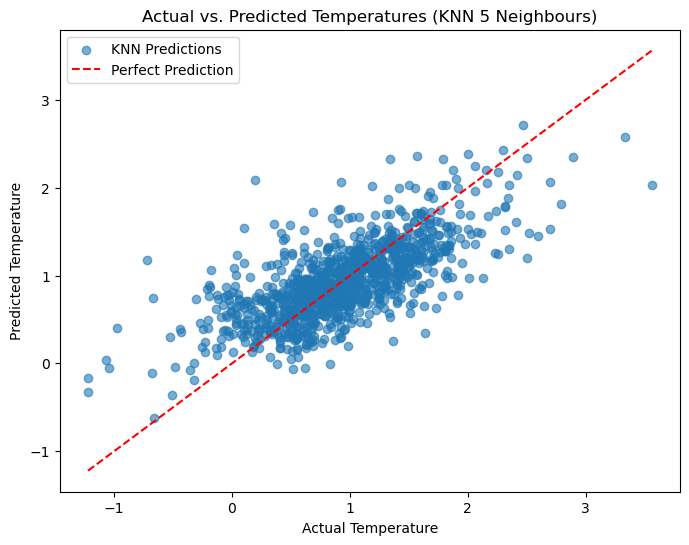

In [61]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted temperatures
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_knn, alpha=0.6, label="KNN Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.legend()
plt.title("Actual vs. Predicted Temperatures (KNN 5 Neighbours)")
plt.show()

In [62]:
# KNN before dropping columns with 3 neighbours.

In [63]:
normalizer = MinMaxScaler()

In [64]:
normalizer.fit(X_train)

MinMaxScaler()

In [65]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [66]:
X_train

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
1635,1992,52.6404,57.2901,43.0961,1347.076600,0.0000,106.963463,526.8216,-10946.0340,120.8350,...,2294.8970,442.3896,0.0,51.8669,1026.004200,2809254.0,7924109.0,5451717.0,5332032.0,2042.377323
6368,2013,46.0044,0.0000,128.9134,699.853800,0.0000,282.000000,809.8819,0.0000,0.0000,...,1469.5430,806.6105,0.0,0.0000,3008.982252,2707779.0,2658498.0,2749149.0,2810945.0,15996.672876
5177,1996,0.0024,0.4358,123.7556,428.420029,193.5308,77.000000,103.3214,-423.2250,0.0000,...,196.1005,477.4978,0.0,0.0000,797.229500,2321309.0,1993391.0,2091245.0,2338950.0,6042.516228
4892,2019,43.1919,28.4722,31.0110,38.078900,673.9482,62.000000,590.1055,-271.4536,3824.6318,...,653.6619,119.0591,0.0,24.8508,64.193800,1349902.0,2876295.0,2118501.0,2114030.0,10456.109695
6542,2003,10.6987,1.3051,1348.7861,1463.391166,26473.7289,1040.000000,9712.0268,-13564.8333,0.0000,...,4705.7335,6092.4916,0.0,0.0000,1432.009200,12309693.0,47270529.0,29122047.0,30527752.0,139486.162266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5984,1997,3.4193,31.2029,13.6407,419.400800,398.4895,3.000000,5.0235,-89.0096,2934.2214,...,46.7348,10.3311,0.0,31.2029,873.876500,154006.0,301948.0,226598.0,226288.0,8856.085867
633,2009,7.0241,27.0949,4.9563,3.589900,154.5093,17.000000,32.8573,-4.9610,3067.7020,...,41.8649,6.6714,0.0,27.0949,52.164900,171893.0,142036.0,157247.0,156923.0,9729.664652
4003,1999,0.0108,0.0000,0.1566,0.000000,0.0000,15.000000,78.7747,-22.9373,0.0000,...,42.2850,7.9181,0.0,0.0000,7.046300,672510.0,503064.0,602736.0,602678.0,6192.139067
5043,2015,0.2719,0.5216,1273.3988,1463.391166,28508.5513,804.000000,4644.8195,-40078.8667,0.0000,...,741.1885,4332.4279,0.0,0.0000,13458.088900,15199849.0,23065377.0,18660163.0,19892982.0,124076.085866


In [67]:
X_train_norm

array([[6.66666667e-02, 4.59274585e-04, 1.09693086e-03, ...,
        7.28618067e-03, 7.42737761e-03, 1.12325828e-01],
       [7.66666667e-01, 4.01377111e-04, 0.00000000e+00, ...,
        3.65151072e-03, 3.89301740e-03, 1.16304815e-01],
       [2.00000000e-01, 2.09394116e-08, 8.34424221e-06, ...,
        2.76669898e-03, 3.23131856e-03, 1.13466445e-01],
       ...,
       [3.00000000e-01, 9.42273522e-08, 0.00000000e+00, ...,
        7.64810803e-04, 7.97205546e-04, 1.13509109e-01],
       [8.33333333e-01, 2.37226084e-06, 9.98705080e-06, ...,
        2.50501525e-02, 2.78406526e-02, 1.47123030e-01],
       [4.00000000e-01, 2.65837818e-02, 1.97115222e-02, ...,
        1.05797355e-02, 1.11864192e-02, 1.27011686e-01]])

In [68]:
X_train.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
count,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4.100000e+03,...,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4.100000e+03,4.100000e+03,4.100000e+03,4.100000e+03,4.100000e+03
mean,2005.125122,1580.120339,1220.442181,1096.363614,5095.553878,4734.471181,439.885441,2532.041560,-22719.579322,2.212633e+04,...,4257.265814,2687.741658,1600.391742,874.204313,3860.135562,2.455878e+07,2.284692e+07,2.392010e+07,2.351607e+07,8.337124e+04
std,8.894393,6114.831863,4238.005222,3879.431384,20537.406754,18105.995063,1649.734743,6562.154968,91720.778141,1.149052e+05,...,10450.820583,8665.718325,26520.415579,3723.023607,13715.208533,1.043522e+08,7.568542e+07,8.843037e+07,8.423336e+07,2.627449e+05
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.369000,-797183.079000,0.000000e+00,...,2.295400,0.595400,0.000000,0.000000,0.031900,0.000000e+00,2.310600e+04,3.405900e+04,3.402500e+04,-3.918841e+05
25%,1997.000000,0.355100,0.000000,19.847800,86.912600,0.000000,6.000000,91.267850,-5669.392700,0.000000e+00,...,223.072000,98.664625,0.000000,0.000000,56.692850,9.578222e+05,1.513850e+06,1.551778e+06,1.595278e+06,6.113002e+03
50%,2005.000000,12.766050,6.206500,129.065300,252.374416,89.453350,29.000000,368.413350,-313.334400,4.451113e+02,...,966.262750,424.629400,0.000000,0.000000,522.004750,3.500996e+06,4.140532e+06,4.488348e+06,4.566249e+06,1.657866e+04
75%,2013.000000,362.528725,217.288925,438.078000,1140.405038,2397.621250,170.000000,1523.787400,0.000000,7.068600e+03,...,3076.484550,1500.233225,0.000000,65.441150,3008.982252,1.130197e+07,1.355207e+07,1.348081e+07,1.352538e+07,6.508636e+04
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,92630.756800,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06


In [69]:
X_train.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
count,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4.100000e+03,...,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4.100000e+03,4.100000e+03,4.100000e+03,4.100000e+03,4.100000e+03
mean,2005.125122,1580.120339,1220.442181,1096.363614,5095.553878,4734.471181,439.885441,2532.041560,-22719.579322,2.212633e+04,...,4257.265814,2687.741658,1600.391742,874.204313,3860.135562,2.455878e+07,2.284692e+07,2.392010e+07,2.351607e+07,8.337124e+04
std,8.894393,6114.831863,4238.005222,3879.431384,20537.406754,18105.995063,1649.734743,6562.154968,91720.778141,1.149052e+05,...,10450.820583,8665.718325,26520.415579,3723.023607,13715.208533,1.043522e+08,7.568542e+07,8.843037e+07,8.423336e+07,2.627449e+05
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.369000,-797183.079000,0.000000e+00,...,2.295400,0.595400,0.000000,0.000000,0.031900,0.000000e+00,2.310600e+04,3.405900e+04,3.402500e+04,-3.918841e+05
25%,1997.000000,0.355100,0.000000,19.847800,86.912600,0.000000,6.000000,91.267850,-5669.392700,0.000000e+00,...,223.072000,98.664625,0.000000,0.000000,56.692850,9.578222e+05,1.513850e+06,1.551778e+06,1.595278e+06,6.113002e+03
50%,2005.000000,12.766050,6.206500,129.065300,252.374416,89.453350,29.000000,368.413350,-313.334400,4.451113e+02,...,966.262750,424.629400,0.000000,0.000000,522.004750,3.500996e+06,4.140532e+06,4.488348e+06,4.566249e+06,1.657866e+04
75%,2013.000000,362.528725,217.288925,438.078000,1140.405038,2397.621250,170.000000,1523.787400,0.000000,7.068600e+03,...,3076.484550,1500.233225,0.000000,65.441150,3008.982252,1.130197e+07,1.355207e+07,1.348081e+07,1.352538e+07,6.508636e+04
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,92630.756800,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06


In [70]:
X_train_norm_df = pd.DataFrame(X_train_norm)

In [71]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
0,0.066667,4.592746e-04,0.001097,0.001287,0.008168,0.000000,0.006499,0.007748,0.811973,0.000075,...,0.024751,0.006258,0.0,0.001002,0.004122,0.003121,0.008759,0.007286,0.007427,0.112326
1,0.766667,4.013771e-04,0.000000,0.003849,0.004244,0.000000,0.017133,0.011914,0.823278,0.000000,...,0.015840,0.011418,0.0,0.000000,0.012090,0.003008,0.002922,0.003652,0.003893,0.116305
2,0.200000,2.093941e-08,0.000008,0.003695,0.002598,0.000803,0.004678,0.001515,0.822840,0.000000,...,0.002092,0.006756,0.0,0.000000,0.003203,0.002579,0.002184,0.002767,0.003231,0.113466
3,0.966667,3.768387e-04,0.000545,0.000926,0.000231,0.002796,0.003767,0.008680,0.822997,0.002383,...,0.007032,0.001678,0.0,0.000480,0.000258,0.001500,0.003163,0.002803,0.002916,0.114725
4,0.433333,9.334353e-05,0.000025,0.040274,0.008874,0.109838,0.063187,0.142933,0.809269,0.000000,...,0.050777,0.086297,0.0,0.000000,0.005754,0.013676,0.052378,0.039120,0.042750,0.151517


In [72]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
0,0.833333,0.076545,0.194546,0.020527,0.030460,0.019107,0.000000,0.007625,0.823278,0.029233,...,0.145236,0.015666,0.00000,0.112734,0.000297,0.040934,0.018859,0.034734,0.037359,0.144355
1,0.933333,0.004372,0.061969,0.117752,0.013464,0.157689,0.111975,0.299299,0.739916,0.059882,...,0.043930,0.108475,0.00000,0.000000,0.081962,0.007632,0.033325,0.024688,0.026090,0.179298
2,0.666667,0.002703,0.020592,0.076200,0.224433,0.016523,0.028191,0.050428,0.836587,0.000000,...,0.028363,0.100687,0.00032,0.006974,0.007270,0.068394,0.029807,0.057850,0.062145,0.148362
3,0.433333,0.001390,0.000000,0.009447,0.000311,0.000000,0.000705,0.000358,0.823202,0.000813,...,0.052080,0.007411,0.00000,0.000000,0.012090,0.011777,0.002255,0.008711,0.008910,0.114537
4,0.733333,0.141872,0.184227,0.262363,0.026617,0.001941,0.397108,0.371853,0.287060,0.486512,...,0.947179,0.173820,0.00000,0.181539,0.085676,0.033595,0.188790,0.132463,0.142178,0.302133


In [73]:
# KNN as our predictive model before dropping columns.

In [74]:
from sklearn.neighbors import KNeighborsRegressor

In [75]:
knn = KNeighborsRegressor(n_neighbors=3)

In [76]:
# Training KNN to our normalized data
knn.fit(X_train_norm, y_train)

KNeighborsRegressor(n_neighbors=3)

In [77]:
# Evaluate model's performance
knn.score(X_test_norm, y_test)

0.4661484556578269

In [78]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [79]:
# Make predictions for KNN model before dropping any rows
pred_knn = knn.predict(X_test_norm)  

# Calculate metrics
print("KNN 3 neighbours")
print("MAE (KNN):", mean_absolute_error(y_test, pred_knn))  
print("RMSE (KNN):", mean_squared_error(y_test, pred_knn, squared=False))  
print("R2 score (KNN):", r2_score(y_test, pred_knn))

KNN 3 neighbours
MAE (KNN): 0.32601217046896025
RMSE (KNN): 0.43221382047128193
R2 score (KNN): 0.4661484556578269


C:\Users\aican\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [80]:
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [81]:
normalizer = MinMaxScaler()

In [82]:
normalizer.fit(X_train)

MinMaxScaler()

In [83]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [84]:
lin_reg = LinearRegression()

In [85]:
lin_reg.fit(X_train_norm, y_train)

LinearRegression()

In [86]:
# Calculate MAE, RMSE and R2 score for linear regression model before dropping any column.
pred = lin_reg.predict(X_test_norm)
print("Linear Regression")
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", lin_reg.score(X_test_norm, y_test))

Linear Regression
MAE 0.3601686665777755
RMSE 0.47656366537448874
R2 score 0.350969571054877


C:\Users\aican\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [87]:
# Normalizing with MinMaxScaler for Random Forest before dropping columns.

In [88]:
normalizer = MinMaxScaler()

In [89]:
normalizer.fit(X_train)

MinMaxScaler()

In [90]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [91]:
X_train

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
1635,1992,52.6404,57.2901,43.0961,1347.076600,0.0000,106.963463,526.8216,-10946.0340,120.8350,...,2294.8970,442.3896,0.0,51.8669,1026.004200,2809254.0,7924109.0,5451717.0,5332032.0,2042.377323
6368,2013,46.0044,0.0000,128.9134,699.853800,0.0000,282.000000,809.8819,0.0000,0.0000,...,1469.5430,806.6105,0.0,0.0000,3008.982252,2707779.0,2658498.0,2749149.0,2810945.0,15996.672876
5177,1996,0.0024,0.4358,123.7556,428.420029,193.5308,77.000000,103.3214,-423.2250,0.0000,...,196.1005,477.4978,0.0,0.0000,797.229500,2321309.0,1993391.0,2091245.0,2338950.0,6042.516228
4892,2019,43.1919,28.4722,31.0110,38.078900,673.9482,62.000000,590.1055,-271.4536,3824.6318,...,653.6619,119.0591,0.0,24.8508,64.193800,1349902.0,2876295.0,2118501.0,2114030.0,10456.109695
6542,2003,10.6987,1.3051,1348.7861,1463.391166,26473.7289,1040.000000,9712.0268,-13564.8333,0.0000,...,4705.7335,6092.4916,0.0,0.0000,1432.009200,12309693.0,47270529.0,29122047.0,30527752.0,139486.162266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5984,1997,3.4193,31.2029,13.6407,419.400800,398.4895,3.000000,5.0235,-89.0096,2934.2214,...,46.7348,10.3311,0.0,31.2029,873.876500,154006.0,301948.0,226598.0,226288.0,8856.085867
633,2009,7.0241,27.0949,4.9563,3.589900,154.5093,17.000000,32.8573,-4.9610,3067.7020,...,41.8649,6.6714,0.0,27.0949,52.164900,171893.0,142036.0,157247.0,156923.0,9729.664652
4003,1999,0.0108,0.0000,0.1566,0.000000,0.0000,15.000000,78.7747,-22.9373,0.0000,...,42.2850,7.9181,0.0,0.0000,7.046300,672510.0,503064.0,602736.0,602678.0,6192.139067
5043,2015,0.2719,0.5216,1273.3988,1463.391166,28508.5513,804.000000,4644.8195,-40078.8667,0.0000,...,741.1885,4332.4279,0.0,0.0000,13458.088900,15199849.0,23065377.0,18660163.0,19892982.0,124076.085866


In [92]:
X_train_norm

array([[6.66666667e-02, 4.59274585e-04, 1.09693086e-03, ...,
        7.28618067e-03, 7.42737761e-03, 1.12325828e-01],
       [7.66666667e-01, 4.01377111e-04, 0.00000000e+00, ...,
        3.65151072e-03, 3.89301740e-03, 1.16304815e-01],
       [2.00000000e-01, 2.09394116e-08, 8.34424221e-06, ...,
        2.76669898e-03, 3.23131856e-03, 1.13466445e-01],
       ...,
       [3.00000000e-01, 9.42273522e-08, 0.00000000e+00, ...,
        7.64810803e-04, 7.97205546e-04, 1.13509109e-01],
       [8.33333333e-01, 2.37226084e-06, 9.98705080e-06, ...,
        2.50501525e-02, 2.78406526e-02, 1.47123030e-01],
       [4.00000000e-01, 2.65837818e-02, 1.97115222e-02, ...,
        1.05797355e-02, 1.11864192e-02, 1.27011686e-01]])

In [93]:
X_train.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
count,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4.100000e+03,...,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4.100000e+03,4.100000e+03,4.100000e+03,4.100000e+03,4.100000e+03
mean,2005.125122,1580.120339,1220.442181,1096.363614,5095.553878,4734.471181,439.885441,2532.041560,-22719.579322,2.212633e+04,...,4257.265814,2687.741658,1600.391742,874.204313,3860.135562,2.455878e+07,2.284692e+07,2.392010e+07,2.351607e+07,8.337124e+04
std,8.894393,6114.831863,4238.005222,3879.431384,20537.406754,18105.995063,1649.734743,6562.154968,91720.778141,1.149052e+05,...,10450.820583,8665.718325,26520.415579,3723.023607,13715.208533,1.043522e+08,7.568542e+07,8.843037e+07,8.423336e+07,2.627449e+05
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.369000,-797183.079000,0.000000e+00,...,2.295400,0.595400,0.000000,0.000000,0.031900,0.000000e+00,2.310600e+04,3.405900e+04,3.402500e+04,-3.918841e+05
25%,1997.000000,0.355100,0.000000,19.847800,86.912600,0.000000,6.000000,91.267850,-5669.392700,0.000000e+00,...,223.072000,98.664625,0.000000,0.000000,56.692850,9.578222e+05,1.513850e+06,1.551778e+06,1.595278e+06,6.113002e+03
50%,2005.000000,12.766050,6.206500,129.065300,252.374416,89.453350,29.000000,368.413350,-313.334400,4.451113e+02,...,966.262750,424.629400,0.000000,0.000000,522.004750,3.500996e+06,4.140532e+06,4.488348e+06,4.566249e+06,1.657866e+04
75%,2013.000000,362.528725,217.288925,438.078000,1140.405038,2397.621250,170.000000,1523.787400,0.000000,7.068600e+03,...,3076.484550,1500.233225,0.000000,65.441150,3008.982252,1.130197e+07,1.355207e+07,1.348081e+07,1.352538e+07,6.508636e+04
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,92630.756800,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06


In [94]:
X_train_norm_df = pd.DataFrame(X_train_norm)

In [95]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
0,0.066667,4.592746e-04,0.001097,0.001287,0.008168,0.000000,0.006499,0.007748,0.811973,0.000075,...,0.024751,0.006258,0.0,0.001002,0.004122,0.003121,0.008759,0.007286,0.007427,0.112326
1,0.766667,4.013771e-04,0.000000,0.003849,0.004244,0.000000,0.017133,0.011914,0.823278,0.000000,...,0.015840,0.011418,0.0,0.000000,0.012090,0.003008,0.002922,0.003652,0.003893,0.116305
2,0.200000,2.093941e-08,0.000008,0.003695,0.002598,0.000803,0.004678,0.001515,0.822840,0.000000,...,0.002092,0.006756,0.0,0.000000,0.003203,0.002579,0.002184,0.002767,0.003231,0.113466
3,0.966667,3.768387e-04,0.000545,0.000926,0.000231,0.002796,0.003767,0.008680,0.822997,0.002383,...,0.007032,0.001678,0.0,0.000480,0.000258,0.001500,0.003163,0.002803,0.002916,0.114725
4,0.433333,9.334353e-05,0.000025,0.040274,0.008874,0.109838,0.063187,0.142933,0.809269,0.000000,...,0.050777,0.086297,0.0,0.000000,0.005754,0.013676,0.052378,0.039120,0.042750,0.151517


In [96]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
0,0.833333,0.076545,0.194546,0.020527,0.030460,0.019107,0.000000,0.007625,0.823278,0.029233,...,0.145236,0.015666,0.00000,0.112734,0.000297,0.040934,0.018859,0.034734,0.037359,0.144355
1,0.933333,0.004372,0.061969,0.117752,0.013464,0.157689,0.111975,0.299299,0.739916,0.059882,...,0.043930,0.108475,0.00000,0.000000,0.081962,0.007632,0.033325,0.024688,0.026090,0.179298
2,0.666667,0.002703,0.020592,0.076200,0.224433,0.016523,0.028191,0.050428,0.836587,0.000000,...,0.028363,0.100687,0.00032,0.006974,0.007270,0.068394,0.029807,0.057850,0.062145,0.148362
3,0.433333,0.001390,0.000000,0.009447,0.000311,0.000000,0.000705,0.000358,0.823202,0.000813,...,0.052080,0.007411,0.00000,0.000000,0.012090,0.011777,0.002255,0.008711,0.008910,0.114537
4,0.733333,0.141872,0.184227,0.262363,0.026617,0.001941,0.397108,0.371853,0.287060,0.486512,...,0.947179,0.173820,0.00000,0.181539,0.085676,0.033595,0.188790,0.132463,0.142178,0.302133


In [97]:
# Random forest before dropping columns.

In [98]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

In [99]:
rf = RandomForestRegressor()

In [100]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [101]:
y_pred = rf.predict(X_test)

In [102]:
# Calculate MAE, RMSE and R2 score for Random Forest Model before dropping columns.
pred = lin_reg.predict(X_test_norm)
print("Random Forest")
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", lin_reg.score(X_test_norm, y_test))

Random Forest
MAE 0.3601686665777755
RMSE 0.47656366537448874
R2 score 0.350969571054877


C:\Users\aican\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\aican\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\aican\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [103]:
# Feature Selection
#  selection of features based on correlactions between themselves but also with the target.
# We want low correlaction between features, but high correlaction between features and our target.

In [104]:
# From the features, drop the columns that have a correlation with "Average Temperature" lower than 5 %.
# Use linear regression.
# Use standarization.
# I will also drop columns that are closely correlated to each other.

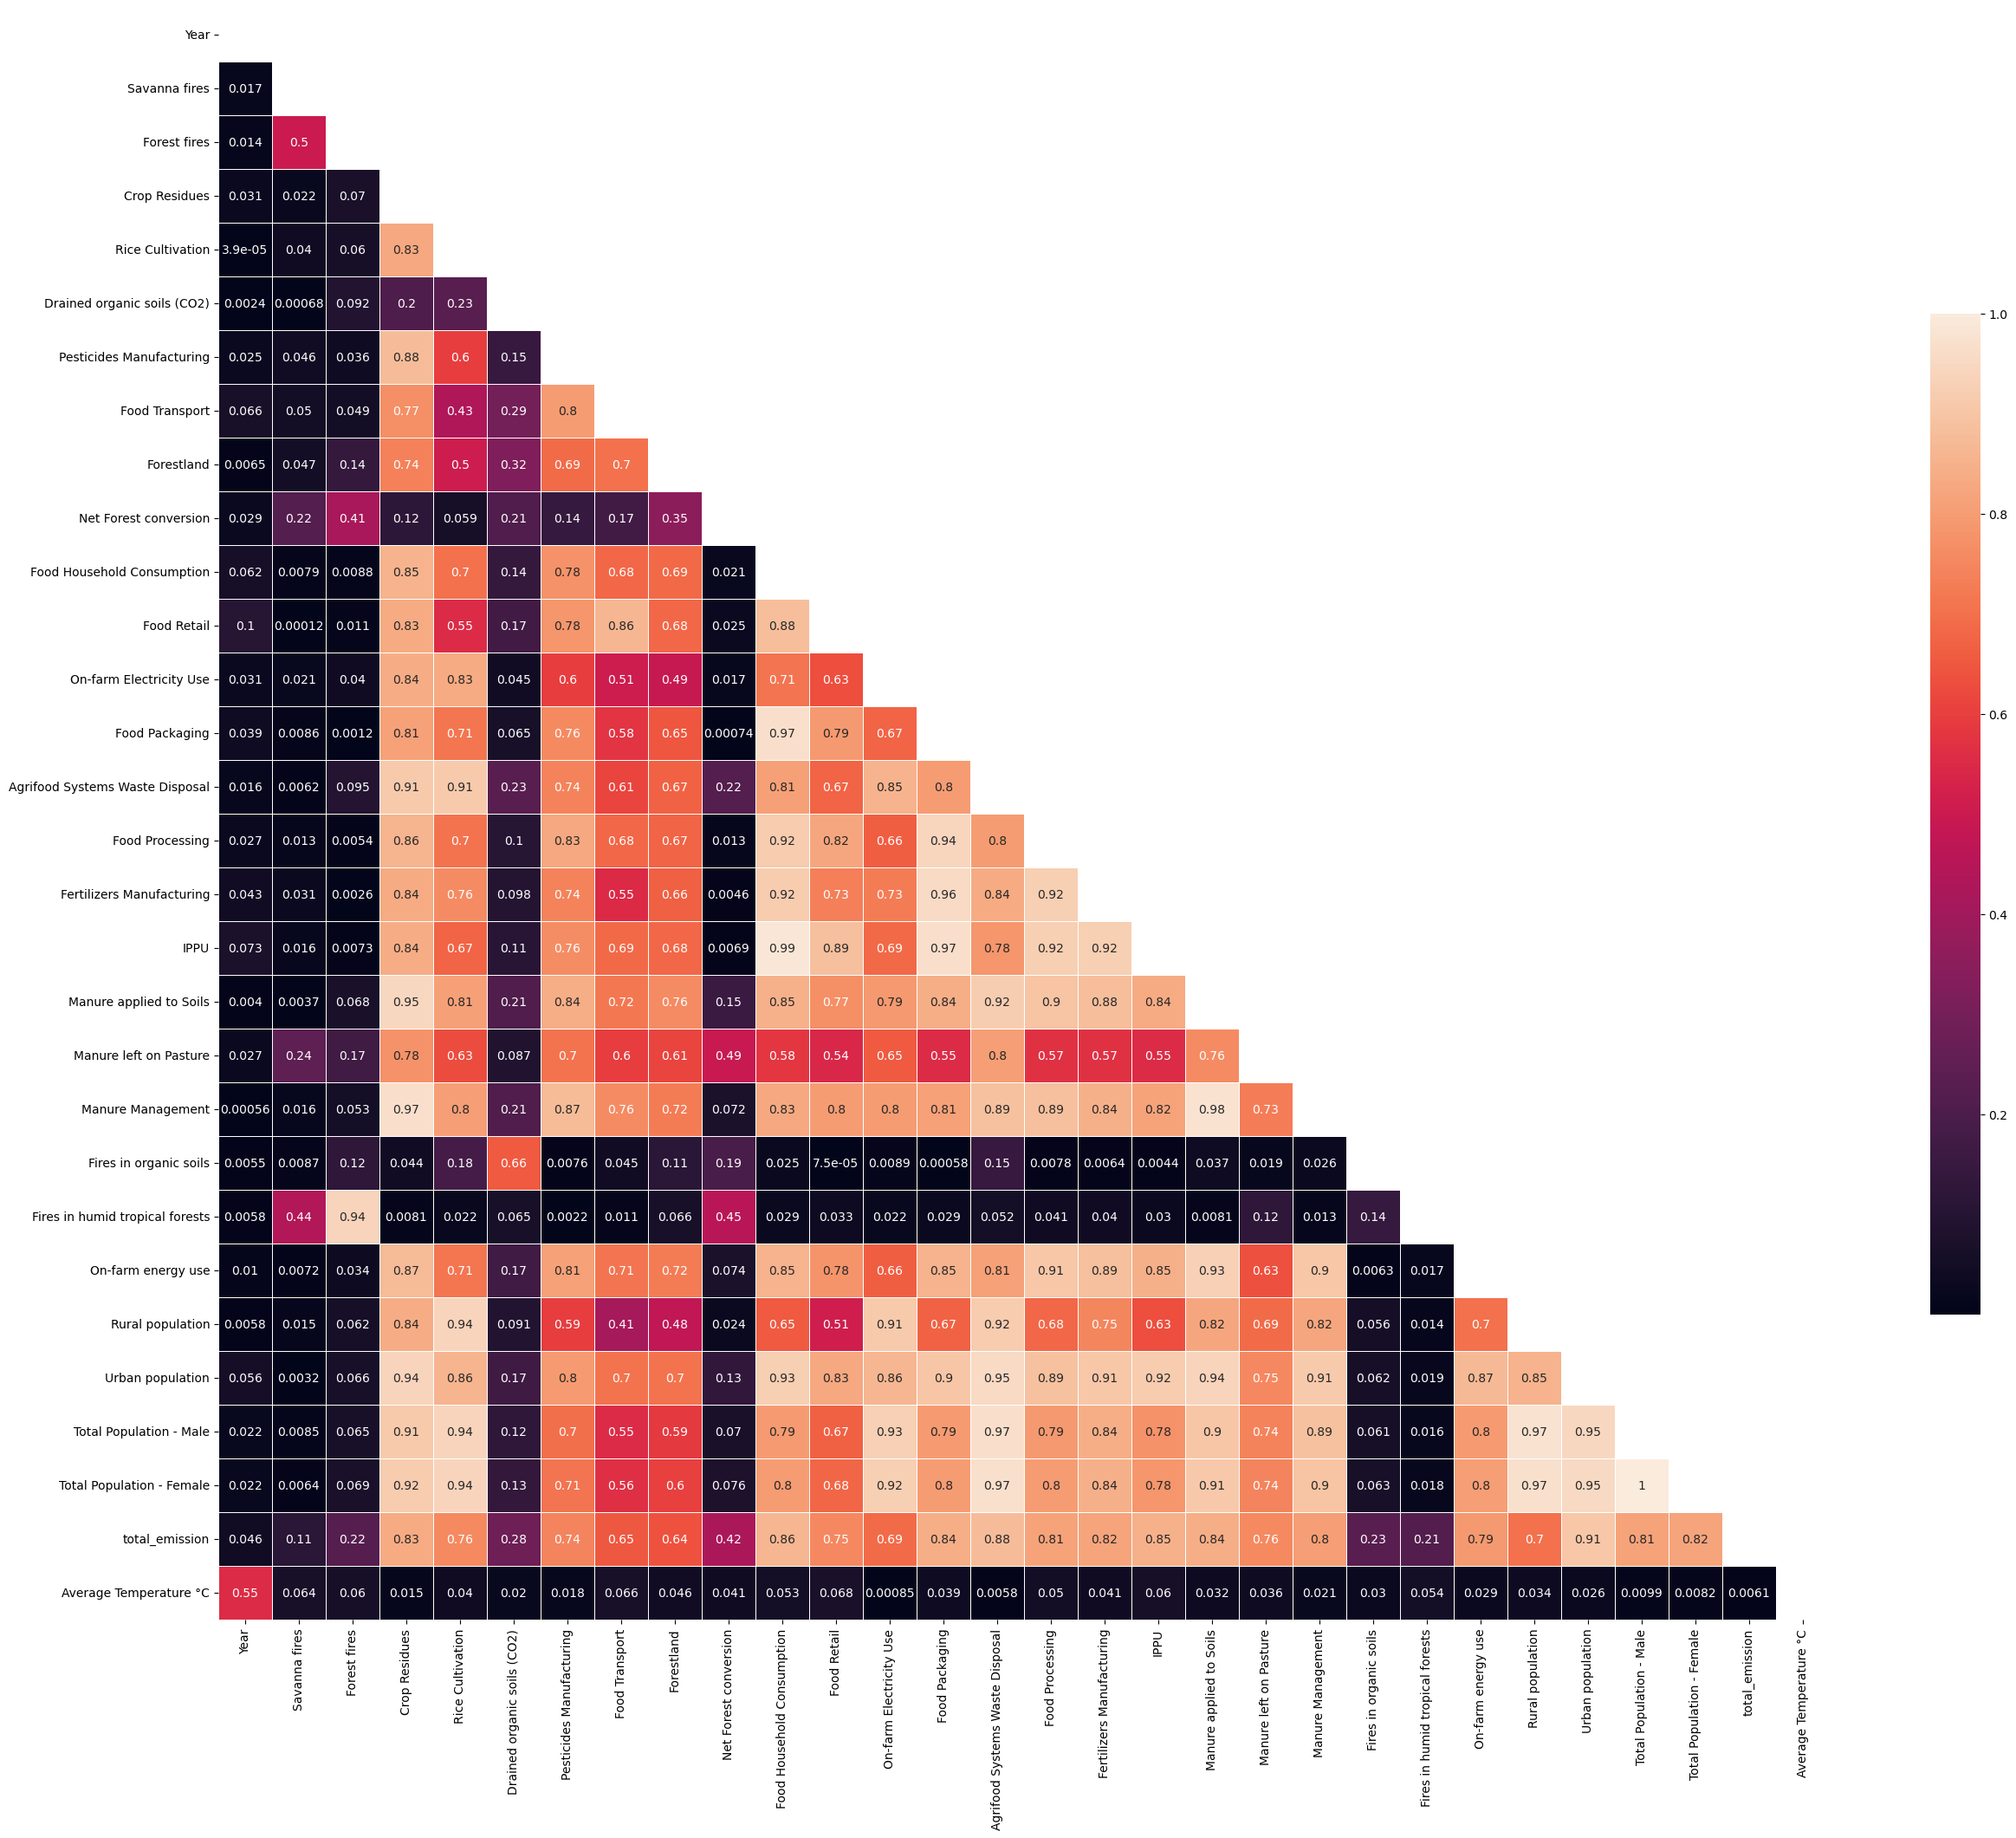

In [105]:
corr=np.abs(df.drop(columns = ['Area']).corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [106]:
# Removing Features (drop columns) with Low Correlation with the target variable (less than 0.05 in correlation graph). 
# They don't contribute much to predicting the target.
# These are above 0.05 correlation in relation to the target. Keep these and drop the rest.
# Year, Savanna fires, Forest fires, Food Transport, Food Household Consumption, Food Retail, Food Processing, IPPU, Fires in humid tropical forests.

In [107]:
# List of columns to keep. These are highly correlated with the target variable.
columns_to_keep = ["Year", "Savanna fires", "Forest fires", "Food Transport",
    "Food Household Consumption", "Food Retail", "Food Processing",
    "IPPU", "Fires in humid tropical forests", "Average Temperature °C"]

In [108]:
print(df[["Crop Residues", "Rice Cultivation"]].var())

Crop Residues       1.480643e+07
Rice Cultivation    4.169984e+08
dtype: float64


In [109]:
# These two dropped columns have high variance.

In [110]:
# Drop all other columns  
df_filtered = df[columns_to_keep]

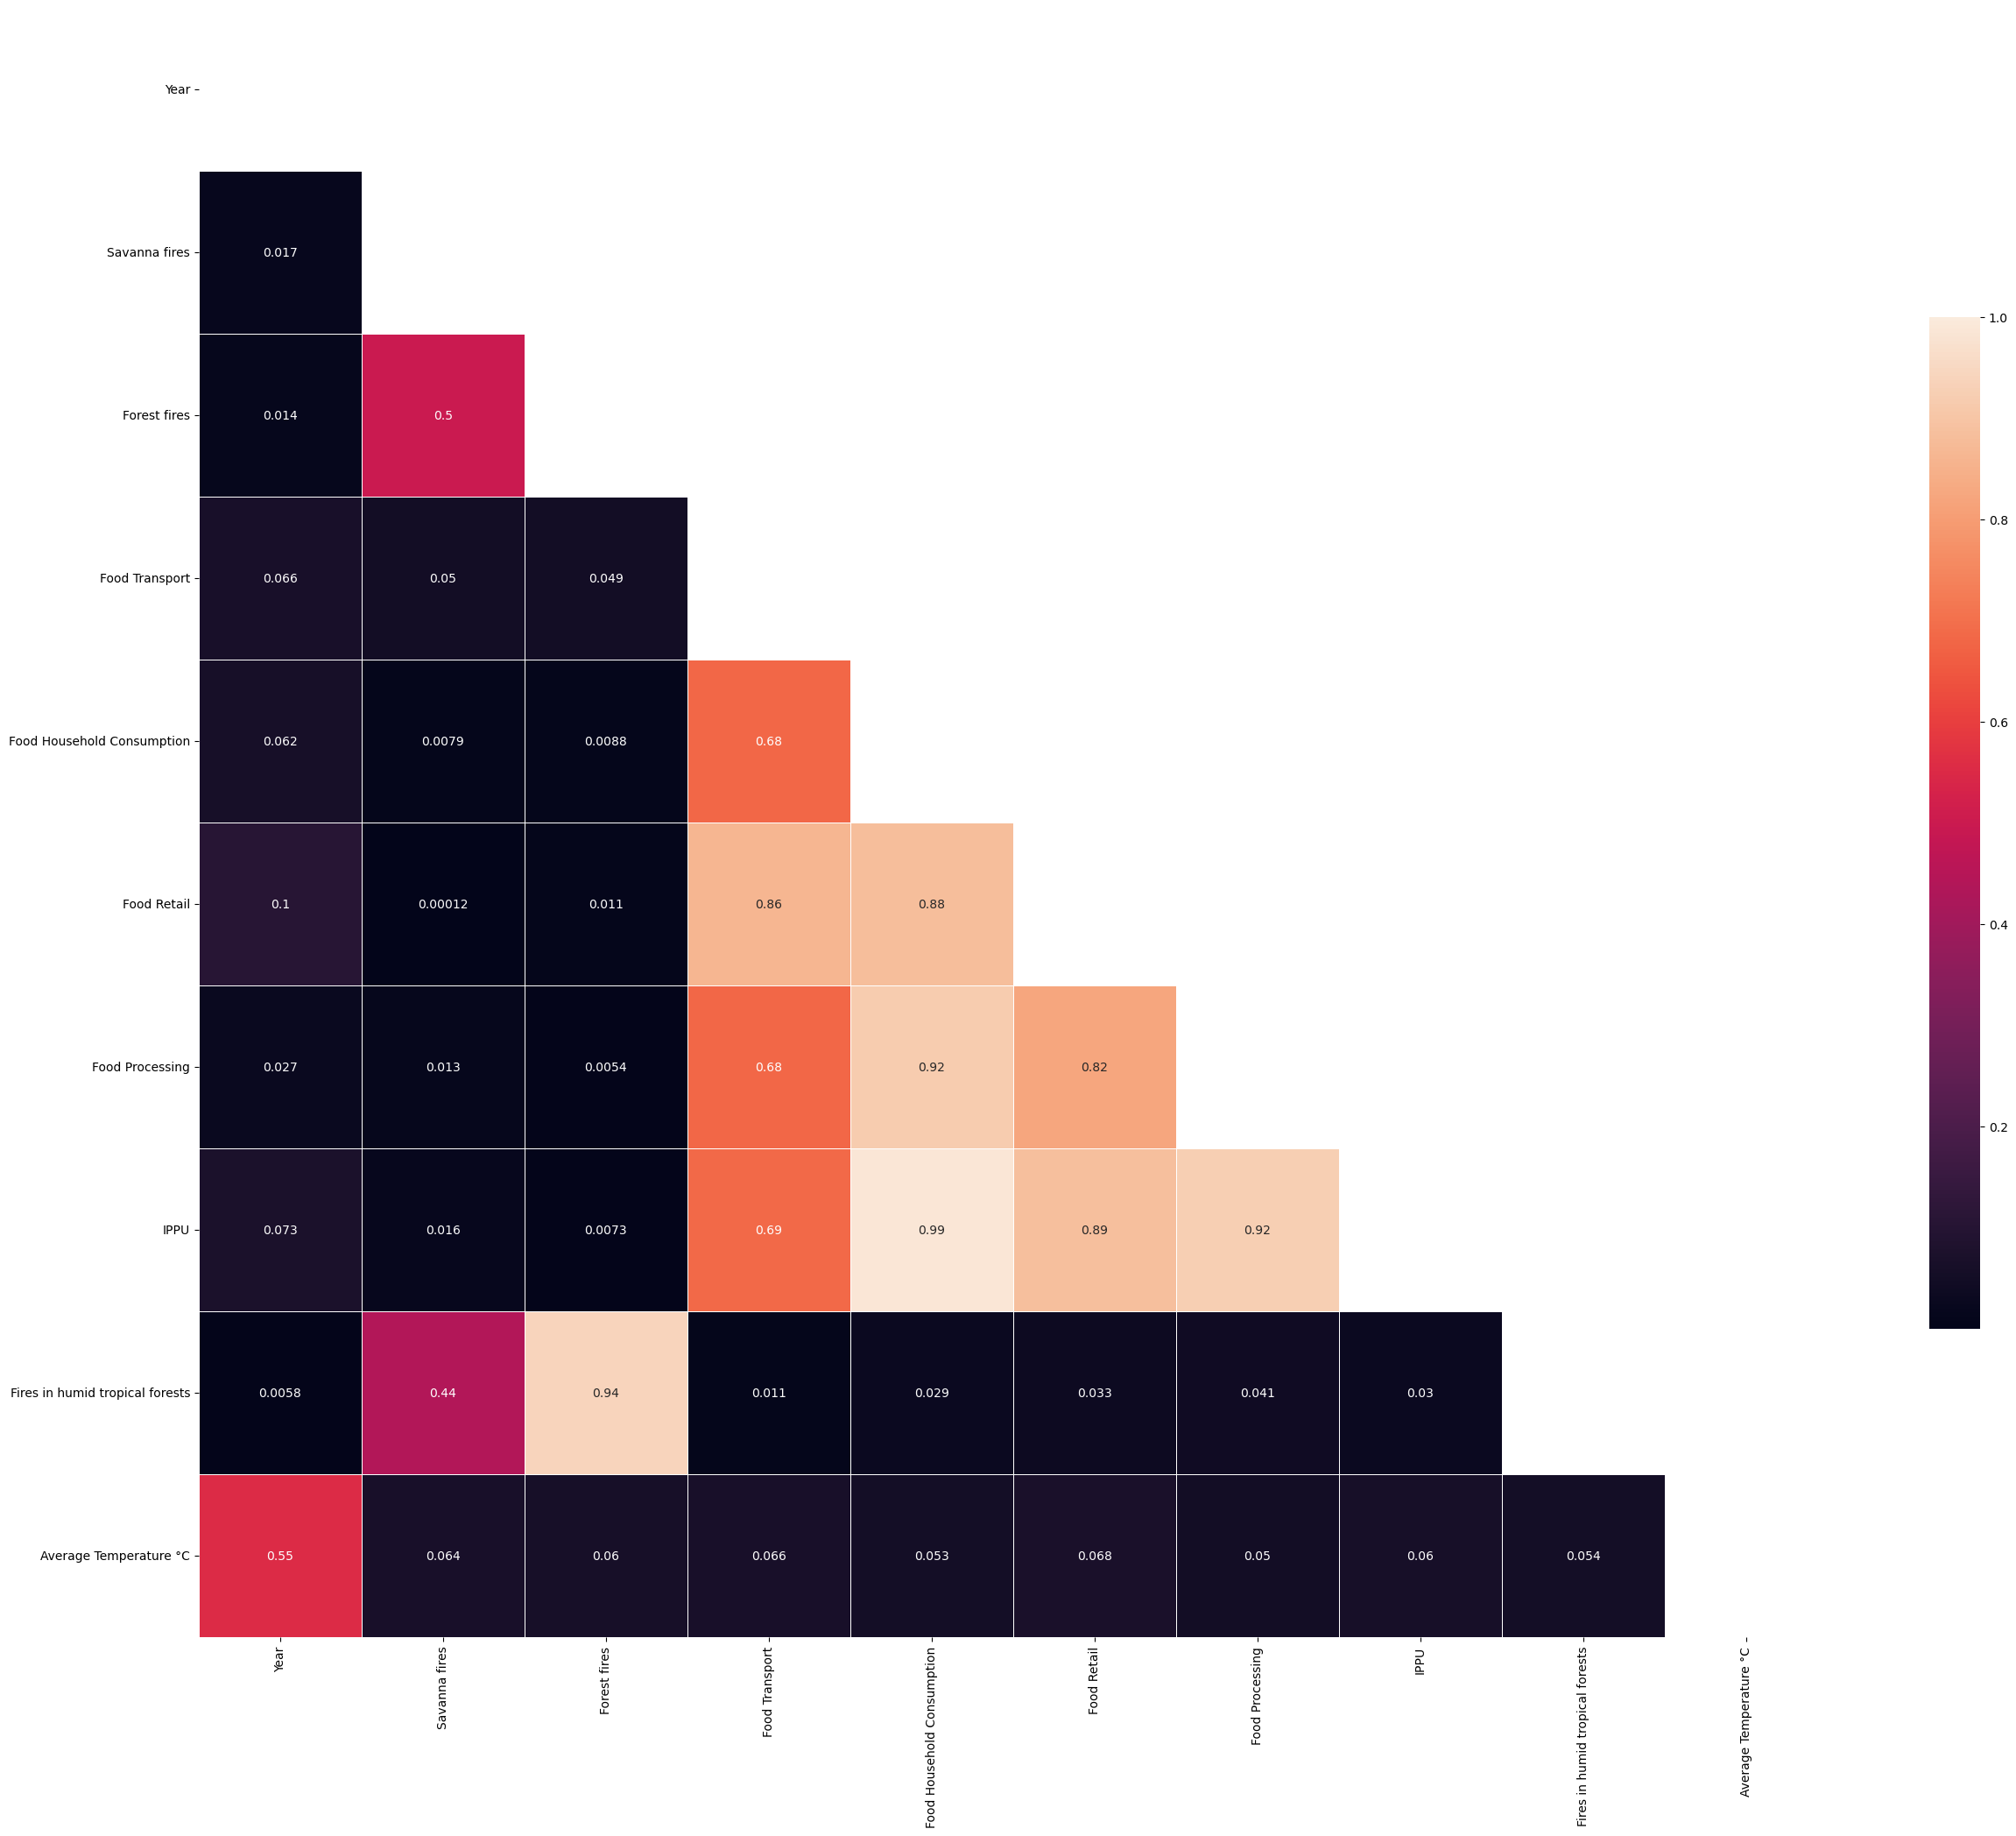

In [111]:
corr=np.abs(df_filtered.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [112]:
# After dropping columns with a low correlation to the target variable, redefine X_train and X_test.

In [113]:
# Redefine X_train and X_test, drop target column.
X_train = df_filtered.drop(columns=["Average Temperature °C"])
X_test = df_filtered.drop(columns=["Average Temperature °C"])
y_train = df_filtered["Average Temperature °C"]

In [114]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (5125, 9)
y_train shape: (5125,)


In [115]:
# Scaling MinMax after dropping columns with a low correlation to the target variable.

In [116]:
normalizer = MinMaxScaler()

In [117]:
normalizer.fit(X_train)

MinMaxScaler()

In [118]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [119]:
X_train

,Year,Savanna fires,Forest fires,Food Transport,Food Household Consumption,Food Retail,Food Processing,IPPU,Fires in humid tropical forests
0,1990,14.7237,0.0557,63.1152,79.0851,109.6446,252.21419,209.9778,0.0
1,1991,14.7237,0.0557,61.2125,80.4885,116.6789,252.21419,217.0388,0.0
2,1992,14.7237,0.0557,53.3170,80.7692,126.1721,252.21419,222.1156,0.0
3,1993,14.7237,0.0557,54.3617,85.0678,81.4607,252.21419,201.2057,0.0
4,1994,14.7237,0.0557,53.9874,88.8058,90.4008,252.21419,182.2905,0.0
...,...,...,...,...,...,...,...,...,...
6960,2016,1190.0089,232.5068,251.1465,251.2681,443.0872,317.07440,858.9820,0.0
6961,2017,1431.1407,131.1324,255.7975,203.1236,445.3881,332.77590,889.4250,0.0
6962,2018,1557.5830,221.6222,327.0897,211.1539,492.8599,348.51070,966.2650,0.0
6963,2019,1591.6049,171.0262,290.1893,228.6381,542.5922,327.82090,945.9420,0.0


In [120]:
X_train_norm

array([[0.00000000e+00, 1.28460673e-04, 1.06648529e-06, ...,
        9.19638504e-04, 1.12791799e-04, 0.00000000e+00],
       [3.33333333e-02, 1.28460673e-04, 1.06648529e-06, ...,
        9.19638504e-04, 1.16584690e-04, 0.00000000e+00],
       [6.66666667e-02, 1.28460673e-04, 1.06648529e-06, ...,
        9.19638504e-04, 1.19311747e-04, 0.00000000e+00],
       ...,
       [9.33333333e-01, 1.35895298e-02, 4.24338990e-03, ...,
        1.27076075e-03, 5.19039479e-04, 0.00000000e+00],
       [9.66666667e-01, 1.38863626e-02, 3.27463065e-03, ...,
        1.19532033e-03, 5.08122765e-04, 0.00000000e+00],
       [1.00000000e+00, 4.20448291e-03, 9.27089731e-04, ...,
        1.12091326e-03, 5.05156564e-04, 0.00000000e+00]])

In [121]:
X_train.describe()

,Year,Savanna fires,Forest fires,Food Transport,Food Household Consumption,Food Retail,Food Processing,IPPU,Fires in humid tropical forests
count,5125.000000,5125.000000,5125.000000,5125.000000,5125.000000,5125.000000,5125.000000,5.125000e+03,5125.000000
mean,2005.228098,1584.117442,1230.841779,2513.274509,6010.115840,2677.055670,5040.124826,2.394580e+04,887.065952
std,8.868613,6044.603810,4263.148224,6433.671680,28897.461907,9818.994156,23011.789511,1.223854e+05,3737.788423
min,1990.000000,0.000000,0.000000,0.369000,0.014800,0.000100,0.000100,0.000000e+00,0.000000
25%,1998.000000,0.312300,0.000000,91.287000,45.683900,75.229100,209.587728,1.650639e+02,0.000000
50%,2005.000000,12.518900,5.988000,370.798400,291.929800,298.514100,318.548422,1.490107e+03,0.000000
75%,2013.000000,379.563800,215.586800,1534.298800,2079.900200,1319.609900,1580.759400,8.530389e+03,63.182300
max,2020.000000,114616.401100,52227.630600,67945.765000,466288.200700,133784.065300,274253.512500,1.861641e+06,51771.256800


In [122]:
X_train_norm_df = pd.DataFrame(X_train_norm)

In [123]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,Year,Savanna fires,Forest fires,Food Transport,Food Household Consumption,Food Retail,Food Processing,IPPU,Fires in humid tropical forests
0,0.000000,0.000128,0.000001,0.000923,0.000170,0.000820,0.00092,0.000113,0.0
1,0.033333,0.000128,0.000001,0.000895,0.000173,0.000872,0.00092,0.000117,0.0
2,0.066667,0.000128,0.000001,0.000779,0.000173,0.000943,0.00092,0.000119,0.0
3,0.100000,0.000128,0.000001,0.000795,0.000182,0.000609,0.00092,0.000108,0.0
4,0.133333,0.000128,0.000001,0.000789,0.000190,0.000676,0.00092,0.000098,0.0


In [124]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,Year,Savanna fires,Forest fires,Food Transport,Food Household Consumption,Food Retail,Food Processing,IPPU,Fires in humid tropical forests
0,0.000000,0.000128,0.000001,0.000923,0.000170,0.000820,0.00092,0.000113,0.0
1,0.033333,0.000128,0.000001,0.000895,0.000173,0.000872,0.00092,0.000117,0.0
2,0.066667,0.000128,0.000001,0.000779,0.000173,0.000943,0.00092,0.000119,0.0
3,0.100000,0.000128,0.000001,0.000795,0.000182,0.000609,0.00092,0.000108,0.0
4,0.133333,0.000128,0.000001,0.000789,0.000190,0.000676,0.00092,0.000098,0.0


In [125]:
# Check for NaNs in X_train_norm
print("Missing values in X_train_norm:", np.isnan(X_train_norm).sum())

# Check for NaNs in y_train
print("Missing values in y_train:", pd.isnull(y_train).sum())

Missing values in X_train_norm: Year                               0
Savanna fires                      0
Forest fires                       0
Food Transport                     0
Food Household Consumption         0
Food Retail                        0
Food Processing                    0
IPPU                               0
Fires in humid tropical forests    0
dtype: int64
Missing values in y_train: 0


In [126]:
# KNN as our predictive model after dropping columns with a low correlation to the target variable.

In [127]:
from sklearn.neighbors import KNeighborsRegressor

In [128]:
knn = KNeighborsRegressor(n_neighbors=10)

In [129]:
# Ensure y_train and X_train_norm match
X_train_norm, y_train = X_train_norm[:len(y_train)], y_train[:len(X_train_norm)]

In [130]:
# Training KNN to our normalized data
knn.fit(X_train_norm, y_train)

KNeighborsRegressor(n_neighbors=10)

In [131]:
# Evaluate model's performance
knn.score(X_test_norm, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [1025, 5125]

In [ ]:
# Make predictions for KNN after dropping columns with a low correlation to the target variable.
pred_knn = knn.predict(X_test_norm)  

# Calculate metrics  
print("MAE (KNN):", mean_absolute_error(y_test, pred_knn))  
print("RMSE (KNN):", mean_squared_error(y_test, pred_knn, squared=False))  
print("R2 score (KNN):", r2_score(y_test, pred_knn))

In [ ]:
# Linear Regression after dropping columns due to their low correlation with the target variable:

In [ ]:
normalizer = MinMaxScaler()

In [ ]:
normalizer.fit(X_train)

In [ ]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train_norm, y_train)

In [ ]:
# Calculate MAE, RMSE and R2 score for Linear Regresssion after dropping columns due to their low correlation with the target variable.
pred = lin_reg.predict(X_test_norm)
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", lin_reg.score(X_test_norm, y_test))

In [ ]:
# Linear Regression yields a lower score (R2) than our previous model, KNN (KNN R2 score was 0.46903469970031453).

In [ ]:
lin_reg_coef = {feature : coef for feature, coef in zip(X_train.columns, lin_reg.coef_)}
lin_reg_coef

In [ ]:
# We can conclude that 'total_emission': 83.70235807043375 has the highest impact in our model.

In [ ]:
# Normalizing with MinMaxScaler for Random Forest after dropping columns due to their low correlation with the target variable.

In [ ]:
normalizer = MinMaxScaler()

In [ ]:
normalizer.fit(X_train)

In [ ]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [ ]:
X_train

In [ ]:
X_train_norm

In [ ]:
X_train.describe()

In [ ]:
X_train_norm_df = pd.DataFrame(X_train_norm)

In [ ]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

In [ ]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

In [ ]:
# Random forest after dropping columns due to their low correlation with the target variable.

In [ ]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
# Calculate MAE, RMSE and R2 score for Random Forest Model after dropping columns due to their low correlation with the target variable.
pred = lin_reg.predict(X_test_norm)
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", lin_reg.score(X_test_norm, y_test))

In [ ]:
# Drop columns that are closely correlated to each other.

In [ ]:
# Select correlations above 0.80
# Food retail (horizontal) with  Food Transport (vertical): 0.86
# I can see no combination where food retail is horizontal and food transport is vertical because this appears white like the background, there is no number
#DONE I drop "Food Transport" because, out of the 2, it is the one with the lower correlation to the target variable. 

# Next:
# Food retail (horizontal) and "Food household consumption" (vertical) : 0.88.
# DONE I drop "Food household consumption".

# Next:
#"Food processing" (horizontal) and : 0.92. We already dropped "Food household consumption". 

# Next:
# "Food processing" (horizontal) and "Food Retail": 0.82
# DONE I drop "Food processing".

# Next:
# "IPPU" and "Food household consumption".
# DONE We already dropped "Food household consumption". 

# Next:
# "IPPU" (horizontal) and "Food retail (vertical): 0.89.
# DONE We drop "IPPU".

# Next: 
#"Fires in humid tropical forests" (horizontal) and "Forest fires" (vertical): 0.94
# We drop "Fires in humid tropical forests".

In [ ]:
# List of columns to drop
columns_to_drop_correlated_to_each_other = ["Food Transport", "Food Household Consumption", "Food Processing", "IPPU", "Fires in humid tropical forests"]

In [ ]:
# Drop columns  
df_cleaned = df_filtered.drop(columns=columns_to_drop_correlated_to_each_other)

In [ ]:
df_cleaned.head()

In [ ]:
corr=np.abs(df_cleaned.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [ ]:
# Scaling MinMax after dropping columns correlated to each other.

In [ ]:
normalizer = MinMaxScaler()

In [ ]:
normalizer.fit(X_train)

In [ ]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [ ]:
X_train

In [ ]:
X_train_norm

In [ ]:
X_train.describe()

In [ ]:
X_train_norm_df = pd.DataFrame(X_train_norm)

In [ ]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

In [ ]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

In [ ]:
# KNN as our predictive model after dropping columns correlated to each other.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)

In [ ]:
# Training KNN to our normalized data
knn.fit(X_train_norm, y_train)

In [ ]:
# Evaluate model's performance
knn.score(X_test_norm, y_test)

In [ ]:
# Make predictions  
pred_knn = knn.predict(X_test_norm)  

# Calculate metrics  
print("MAE (KNN):", mean_absolute_error(y_test, pred_knn))  
print("RMSE (KNN):", mean_squared_error(y_test, pred_knn, squared=False))  
print("R2 score (KNN):", r2_score(y_test, pred_knn))

In [ ]:
# Linear Regression after dropping columns due to their high correlation with each other:

In [ ]:
normalizer = MinMaxScaler()

In [ ]:
normalizer.fit(X_train)

In [ ]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train_norm, y_train)

In [ ]:
# Calculate MAE, RMSE and R2 score for Linear Regression after dropping columns due to their high correlation with each other:
pred = lin_reg.predict(X_test_norm)
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", lin_reg.score(X_test_norm, y_test))

In [ ]:
# Linear Regression yields a lower score (R2) than our previous model, KNN (KNN R2 score was 0.46903469970031453).

In [ ]:
lin_reg_coef = {feature : coef for feature, coef in zip(X_train.columns, lin_reg.coef_)}
lin_reg_coef

In [ ]:
# We can conclude that 'total_emission': 83.70235807043375 has the highest impact in our model.

In [ ]:
# Next steps:
# I will apply these models: random forest, knn and linear regression.
# For each of these models, I will compare the values for MAE, RMSE and R2 score.
# I will calculate the values for MAE, RMSE and R2 score once before and once after the column dropping, in order to see which state gives the best values.
# I will also compare the MAE, RMSE and R2 score once before the column dropping, once after dropping columns with low correlation with the target variable, and once after dropping columns that are closely correlated to each other.

In [ ]:
# Normalizing with MinMaxScaler for Random Forest after dropping columns with high correlation to each other.

In [ ]:
normalizer = MinMaxScaler()

In [ ]:
normalizer.fit(X_train)

In [ ]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [ ]:
X_train

In [ ]:
X_train_norm

In [ ]:
X_train.describe()

In [ ]:
X_train_norm_df = pd.DataFrame(X_train_norm)

In [ ]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

In [ ]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

In [ ]:
# Random forest after dropping columns with high correlation to each other.

In [ ]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
# Calculate MAE, RMSE and R2 score for Random Forest Model after dropping all columns.
pred = lin_reg.predict(X_test_norm)
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", lin_reg.score(X_test_norm, y_test))